<h1><center>WeRateDogs-Project</center></h1>

In [1]:
#Import the packages needed for this project
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline
import re

## Part 1: Data_Wrangling

## I. Gathering data

> The WeRateDogs Twitter archive(twitter_archive_enhanced.csv). I Download this file manually from the Udacity Resources.<br><br>
The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and I download it programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv<br><br>
>Each tweet's retweet count and favorite ("like") count at minimum, and any additional data that can be interesting. Using the tweet IDs in the WeRateDogs Twitter archive, the Twitter API for each tweet's JSON data should be query using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then I read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

### 1. Twitter Archive

In [2]:
#Load the csv file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

#Display the 5 first lines of the dataset
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. Image Predictions

In [3]:
#get the tweet image predictions url
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#Write the file with the name image_predictions in tsv format
with open ('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

# read the tsv file using pandas
image_prediction = pd.read_csv('image_predictions.tsv', sep ='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Twitter API

In [4]:
#Import the packages needed
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = '########'
consumer_secret = '########'
access_token = '########'
access_secret = '########'

In [5]:
#Tweepy library
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
# List of Tweet Ids generated from the twitter_archive
tweet_id = twitter_archive['tweet_id'].tolist()

In [7]:
#Create lists for both successful and error tweets
error_dict = {}

#Record the start time
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w', encoding='utf8') as f:
    for tweets in tweet_id:
        try :
            tweet = api.get_status(tweets, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except tweepy.TweepError as e:
            error_dict[tweets] = e

#Record the end time
end = timer()

print(end - start)
print()
print()
print(error_dict)
print()

Rate limit reached. Sleeping for: 170
Rate limit reached. Sleeping for: 194


2126.9097403329997


{888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 873697596434513921: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 872668790621863937: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 872261713294495745: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 869988702071779329: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 866816280283807744: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 861769973181624320: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 856602993587888130: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 851953902622658560: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 845459076796616705: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 844704788403113984: TweepError([{'code': 144, 'm

In [8]:
len(error_dict)

25

> From the above results, we note that:<br><br>
> The number of the errors we got is 25.<br><br>
> time to do complet the creation of the list is about 2127 second, which means about 35 min.

In [7]:
#Read the Tweet_json file using pandas and display the first of its five rows.
tweet_data = pd.read_json("tweet_json.txt", lines = True)
tweet_data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


#### Gathering Conclusion

> **For this step, we gathered three main data:**<br><br>
>    > The twitter_archive_enhanced.csv file, which downloaded manually from the classroom.<br><br>
>    > The image_predictions.tsv file which is hosted on Udacity's servers and downloaded programmatically using the Requests library.<br><br>
>    > query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.<br><br>

## II. Assessing Data
> After gathering the data needed in our first step, now it's time to assess our collected data visually and programmatically for quality and tidiness issues.

### 1. Twitter_Archive

In [8]:
#Display the twitter_archive data for visuall assessment
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
#Get a random sample from the data to see if there is someting that need to be cleaned
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
581,800443802682937345,NaN,NaN,2016-11-20 21:00:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sampson. He's about to ...,7.761133e+17,4.196984e+09,2016-09-14 17:40:06 +0000,https://twitter.com/dog_rates/status/776113305...,11,10,Sampson,None,None,pupper,None
213,851591660324737024,NaN,NaN,2017-04-11 00:24:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh jeez u did me quite the spook little fella....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/851591660...,11,10,None,None,None,None,None
1826,676440007570247681,NaN,NaN,2015-12-14 16:34:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hope your Monday isn't too awful. Here's two b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676440007...,11,10,None,None,None,None,None
2177,669037058363662336,NaN,NaN,2015-11-24 06:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Pancho and Peaches. Pancho is a C...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669037058...,10,10,None,None,None,None,None
1050,743210557239623680,NaN,NaN,2016-06-15 22:36:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Kayla, an underground poker legend. Playe...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/743210557...,10,10,Kayla,None,None,None,None
1085,738184450748633089,NaN,NaN,2016-06-02 01:44:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","For the last time, we only rate dogs. Pls stop...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/738184450...,9,10,None,None,None,None,None
698,786363235746385920,NaN,NaN,2016-10-13 00:29:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rizzo. He has many talents. A true ren...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/786363235...,13,10,Rizzo,doggo,None,None,None
809,771500966810099713,NaN,NaN,2016-09-02 00:12:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dakota. He's just saying hi. That's al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771500966...,12,10,Dakota,None,None,None,None
2214,668544745690562560,NaN,NaN,2015-11-22 21:41:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",It is an honor to rate this pup. He is a Snork...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668544745...,10,10,None,None,None,None,None
721,783334639985389568,NaN,NaN,2016-10-04 15:55:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dave. He's currently in a predicament....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783334639...,12,10,Dave,None,None,None,None


In [10]:
#From the last query, we see that there was some rows without a name attached to them
#So let's count the unique names of our data to get the number of our null values as well as
#if it has some names that should be cleaned as well.
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
           ... 
Tedders       1
Blu           1
Carter        1
Ashleigh      1
Daniel        1
Name: name, Length: 957, dtype: int64

In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
# From the above query, we observe that expanded urls have missing values
# Let's check this out
twitter_archive['expanded_urls'].isnull().sum()

59

In [13]:
# Maybe these tweets without expanded urls are just replies since replies in twitter do not have urls
# Let's check it out
twitter_archive[twitter_archive['expanded_urls'].isnull()].loc[:,['tweet_id', 'expanded_urls', 
                                                                  'in_reply_to_status_id', 
                                                                  'in_reply_to_user_id',
                                                                 'retweeted_status_id']]

,tweet_id,expanded_urls,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id
30,886267009285017600,NaN,8.862664e+17,2.281182e+09,NaN
55,881633300179243008,NaN,8.816070e+17,4.738443e+07,NaN
64,879674319642796034,NaN,8.795538e+17,3.105441e+09,NaN
113,870726314365509632,NaN,8.707262e+17,1.648776e+07,NaN
148,863427515083354112,NaN,8.634256e+17,7.759620e+07,NaN
179,857214891891077121,NaN,8.571567e+17,1.806710e+08,NaN
185,856330835276025856,NaN,NaN,NaN,8.563302e+17
186,856288084350160898,NaN,8.562860e+17,2.792810e+08,NaN
188,855862651834028034,NaN,8.558616e+17,1.943518e+08,NaN
189,855860136149123072,NaN,8.558585e+17,1.361572e+07,NaN


In [14]:
# let's get a summary statistic of our data
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
# From the summary Query, we observe that rating_numerator and rating_denominator have Zeroes as Min values
# and the max values are huge
# Let's their values
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
twitter_archive.rating_denominator.sort_values().value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

### 2. Image_Prediction

In [17]:
# Display the first ten rows of our data
image_prediction.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [18]:
# Display the last ten rows
image_prediction.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [19]:
# Get the info of our data
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
# Get random sample of 10
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1696,816450570814898180,https://pbs.twimg.com/media/C1SddosXUAQcVR1.jpg,1,web_site,0.352857,False,envelope,0.060107,False,nail,0.031291,False
1606,800459316964663297,https://pbs.twimg.com/media/CxvNfrhWQAA2hKM.jpg,1,teddy,0.311928,False,ice_bear,0.184657,False,Christmas_stocking,0.173229,False
524,676603393314578432,https://pbs.twimg.com/media/CWPHMqKVAAAE78E.jpg,1,whippet,0.877021,True,Great_Dane,0.034182,True,boxer,0.028404,True
1318,755955933503782912,https://pbs.twimg.com/ext_tw_video_thumb/75595...,1,Pekinese,0.596882,True,Maltese_dog,0.176478,True,Great_Pyrenees,0.026775,True
151,668643542311546881,https://pbs.twimg.com/media/CUd_wYRWUAAZsKr.jpg,1,common_iguana,0.483972,False,frilled_lizard,0.111377,False,sandbar,0.078983,False
1148,731156023742988288,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False
1989,872967104147763200,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True
848,695446424020918272,https://pbs.twimg.com/media/Caa407jWwAAJPH3.jpg,1,basenji,0.748904,True,Cardigan,0.121102,True,Pembroke,0.111767,True
1942,861288531465048066,https://pbs.twimg.com/ext_tw_video_thumb/86128...,1,syringe,0.144712,False,oxygen_mask,0.106684,False,Bouvier_des_Flandres,0.082610,True
1796,831322785565769729,https://pbs.twimg.com/media/C4lzqQ4UEAApzU0.jpg,1,Old_English_sheepdog,0.999715,True,Tibetan_terrier,0.000046,True,guinea_pig,0.000041,False


In [21]:
# Check if there is some duplicates in terms of jpg_url
image_prediction.jpg_url.value_counts()

https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg    2
https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg    2
https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg    2
https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg    2
                                                  ..
https://pbs.twimg.com/media/CdZI_bpWEAAm1fs.jpg    1
https://pbs.twimg.com/media/CpG_CrlWYAYyuP3.jpg    1
https://pbs.twimg.com/media/C7JkO0rX0AErh7X.jpg    1
https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg    1
https://pbs.twimg.com/media/CU3d0azWUAA38FD.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [22]:
# Since there are some duplicated jpg_url, let's check if they have the same tweete_id or not
# get Unique tweet_id and unique tweet_id
image_prediction.tweet_id.nunique(), image_prediction.jpg_url.nunique()

(2075, 2009)

In [23]:
# Get the number of duplicated jpg_url
image_prediction['jpg_url'].duplicated().sum()

66

In [24]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### 3. Tweet_data

In [25]:
tweet_data.head(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
5,2017-07-29 00:08:17+00:00,891087950875897856,891087950875897856,Here we have a majestic great white breaching ...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
6,2017-07-28 16:27:12+00:00,890971913173991426,890971913173991424,Meet Jax. He enjoys ice cream so much he gets ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
7,2017-07-28 00:22:40+00:00,890729181411237888,890729181411237888,When you watch your owner call another dog a g...,False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
8,2017-07-27 16:25:51+00:00,890609185150312448,890609185150312448,This is Zoey. She doesn't want to be one of th...,False,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
9,2017-07-26 15:59:51+00:00,890240255349198849,890240255349198848,This is Cassie. She is a college pup. Studying...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [26]:
tweet_data.tail(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
2321,2015-11-16 01:01:59+00:00,666058600524156928,666058600524156928,Here is the Rand Paul of retrievers folks! He'...,False,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666058597072306176, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2322,2015-11-16 00:55:59+00:00,666057090499244032,666057090499244032,My oh my. This is a rare blond Canadian terrie...,False,"[0, 124]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666057085227016192, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2323,2015-11-16 00:49:46+00:00,666055525042405380,666055525042405376,Here is a Siberian heavily armored polar bear ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666055517517848576, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2324,2015-11-16 00:35:11+00:00,666051853826850816,666051853826850816,This is an odd dog. Hard on the outside but lo...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666051848592334848, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2325,2015-11-16 00:30:50+00:00,666050758794694657,666050758794694656,This is a truly beautiful English Wilson Staff...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666050754986266625, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2326,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2327,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2328,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2329,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2330,2015-11-15 22:32:08+00:00,666020888022790149,666020888022790144,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [27]:
tweet_data.sample(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
1302,2016-03-05 16:24:01+00:00,706153300320784384,706153300320784384,This is Layla. She's giving you a standing ova...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
496,2016-12-21 19:01:02+00:00,811647686436880384,811647686436880384,PUPDATE: I've been informed that Augie was act...,False,"[0, 136]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",8.116272e+17,...,False,False,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN
2167,2015-11-23 23:23:31+00:00,668932921458302977,668932921458302976,This is Herald. He likes to swing. Subtle tong...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 668932892672851968, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
507,2016-12-15 02:14:29+00:00,809220051211603969,809220051211603968,This is Kyro. He's a Stratocumulus Flop. Tongu...,False,"[0, 126]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 809220046199328768, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2177,2015-11-23 04:13:37+00:00,668643542311546881,668643542311546880,Fascinating dog here. Loves beach. Oddly long ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 668643538813472768, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
624,2016-10-31 22:00:04+00:00,793210959003287553,793210959003287552,This is Maude. She's the h*ckin happiest wasp ...,False,"[0, 92]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 793210952363732998, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1978,2015-12-03 17:58:48+00:00,672475084225949696,672475084225949696,This is Buddy. He's photogenic af. Loves to se...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 672475077217288193, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1783,2015-12-15 22:52:02+00:00,676897532954456065,676897532954456064,Exotic handheld dog here. Appears unathletic. ...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 676897528592392192, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1538,2016-01-16 04:11:31+00:00,688211956440801280,688211956440801280,This is Derby. He's a superstar. 13/10 (vid by...,False,"[0, 82]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 688211379870806016, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1508,2016-01-21 02:56:40+00:00,690005060500217858,690005060500217856,"""I'm the only one that ever does anything in t...",False,"[0, 90]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 690005054112284675, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [28]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2331 non-null   datetime64[ns, UTC]
 1   id                             2331 non-null   int64              
 2   id_str                         2331 non-null   int64              
 3   full_text                      2331 non-null   object             
 4   truncated                      2331 non-null   bool               
 5   display_text_range             2331 non-null   object             
 6   entities                       2331 non-null   object             
 7   extended_entities              2059 non-null   object             
 8   source                         2331 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [29]:
tweet_data.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.331000e+03,2.331000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,0.0,0.0,0.0,2331.000000,2331.000000,2196.0,2196.0,2.600000e+01,2.600000e+01
mean,7.419079e+17,7.419079e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,NaN,NaN,NaN,2697.939511,7539.258687,0.0,0.0,8.113972e+17,8.113972e+17
std,6.823170e+16,6.823170e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,NaN,NaN,NaN,4561.013033,11703.060689,0.0,0.0,6.295843e+16,6.295843e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,1.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.782670e+17,6.782670e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,NaN,NaN,NaN,546.000000,1316.000000,0.0,0.0,7.761338e+17,7.761338e+17
50%,7.182469e+17,7.182469e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1266.000000,3278.000000,0.0,0.0,8.281173e+17,8.281173e+17
75%,7.986692e+17,7.986692e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3137.000000,9232.500000,0.0,0.0,8.637581e+17,8.637581e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,77591.000000,155721.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [30]:
# Get the number of original tweets and the number retweets
orig_tweet = tweet_data['retweeted_status'].isnull().sum() 
retw_tweet = tweet_data['retweeted_status'].notnull().sum()

# Print the results
print('the number of Original tweets is: ', orig_tweet)
print('the number of Retweets is: ', retw_tweet)

the number of Original tweets is:  2168
the number of Retweets is:  163


#### Quality
##### `twitter_archive` table
- tweet_id datatype.
- DataSet contains Retweets.
- Name column has some invalid values such as **None, a**.
- Some dog satges showing as none.
- Datatype of timestamp.
- rating_numerator have some inexpected values.
- Datatype of rating_numerator and rating_denominator.
- Remove tweets that do not have an image from the master_archive

##### `Image_prediction` table
- The datatype of tweet_id declared as integer, is it the right format?
- Duplicated jpg_url with the tweet_id different.
- Three predictions for each dog?

##### `tweet_data` table
- The 'id' column named **id** while in the other two table is named **tweet_id**.
- id datatype.

#### Tidiness
- Four columns for the stage?
- Join image_prediction and tweet_data tables to the twitter_archive table in one dataset called master_archive.

## III. Cleaning data

In [31]:
# Make a copy of our three dataset
archive_clean = twitter_archive.copy()
image_clean = image_prediction.copy()
tweet_clean = tweet_data.copy()

### 1. `twitter_archive` table.

**1.1. Tweet_id datatype.**<br><br>

 **a. Define**
> Change the tweet_id datatype to string.

 **b. Code**

In [32]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)

 **c. Test**

In [33]:
archive_clean.tweet_id.dtypes

dtype('O')

**1.2. Remove retweets and keep the original tweets.**

 **a. Define**
> Keep the original tweets by removing rows that have retweet_status_id column is not null.

 **b. Code**

In [34]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

 **c. Test**

In [35]:
archive_clean.retweeted_status_id.notnull().sum()

0

**1.3. Correct the Name column values.**<br><br>

**a. Define**
> Check names with name lowercase and None, and then check the text column, to see if it contains the valid name and then replace these invalid values with the name extracting from the text column.<br><br>
> And then check if there is still some rows with lowercase or None in names(means text column does not have the valid name), and then replace them by None.
> For those None as name, replace them with NAN.

**b. Code**

In [36]:
# Get the unique names in our dataset
archive_clean.name.unique(), archive_clean.name.value_counts()

(array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
        'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
        'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
        'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
        'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
        'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
        'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
        'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
        'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
        'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
        'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
        'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
        'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
        'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey'

In [37]:
# Based on the above results, we see that there is a name with 'O',
# let's display this row and see if we can get the name
archive_clean.query('name=="O"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None


In [38]:
# From the last query , we can see from the text column that the name of this dog 
# is actually **O'Malley** instead of "O". So replace "O" with **O'Malley**.
archive_clean.name = archive_clean.name.replace('O', "O'Malley")

In [39]:
# Based on the above results, we see that our dataset has all names starting with an uppercase 
# but the one that named *a* is lower, and there is a lot of None values(680). 

#We are going to search for those rows starting with a lowercase and their associated text column having the word 
# **name is** or **named** and replace them by the correct word (Extracting from the text column), 
# For the those having the name column as **None**, we are going to search for those having in their text column 
#the words **named** or **name is** and replace them by the appropriate name (extracting from the text column).

# those with lowercase and text having one of the two words.
lower_name_is = archive_clean.loc[(archive_clean['name'].str.islower()) &\
                                       (archive_clean['text'].str.contains('name is'))]
lower_named = archive_clean.loc[(archive_clean['name'].str.islower()) &\
                                     (archive_clean['text'].str.contains('named'))]

# those with None and text having at least one of the two words.
none_name_is = archive_clean.loc[(archive_clean['name']=='None') & (archive_clean['text'].str.contains('name is'))]
none_named = archive_clean.loc[(archive_clean['name']=='None') & (archive_clean['text'].str.contains('named'))]

In [40]:
# Save these locations as lists
lower_name_is = lower_name_is['text'].tolist()
lower_named = lower_named['text'].tolist()
none_name_is = none_name_is['text'].tolist()
none_named = none_named['text'].tolist()

In [41]:
# For loop to iterate through each of the four locations created before 
# then set the 'name' value to be the word that appears after the word **named** or **name is**

# For those with lowercase and having the word 'name is'
for entry in lower_name_is:
    mask = archive_clean.text == entry
    name_column = 'name'
    archive_clean.loc[mask, name_column] = re.findall(r'name is\s(\w+)',entry)
    
# For those with lowercase and having the word 'named'
for entry in lower_named:
    mask = archive_clean.text == entry
    name_column = 'name'
    archive_clean.loc[mask, name_column] = re.findall(r'named\s(\w+)',entry)
    
# For those with name None and having the word in the text column as 'name is'
for entry in none_name_is:
    mask = archive_clean.text == entry
    name_column = 'name'
    archive_clean.loc[mask, name_column] = re.findall(r'name is\s(\w+)',entry)
    
# For those with name None and having the word in the text column as 'named'
for entry in none_named:
    mask = archive_clean.text == entry
    name_column = 'name'
    archive_clean.loc[mask, name_column] = re.findall(r'named\s(\w+)',entry)

In [42]:
# Now, we are going to check if we still have some rows with name as None.
archive_clean.query('name=="None"').count()[0]

671

In [43]:
# Now, it's time to check if we still have some rows with lowercase in the name column.
archive_clean.name.str.islower().sum()

82

In [44]:
# Based on the above output, we still have 84 rows with lowercase names. So we are going to replace them by None.
# For loop to iterate through each name in the name column and replace those with lowercase by None.
for name in archive_clean.name:
    if name.islower():
        archive_clean.name.replace(name, 'None', inplace = True)

In [45]:
# Now that we have replaced all the lowercase left by None, 
# it's time to replace all None values with NAN in the name columns
archive_clean['name'] = archive_clean['name'].replace('None', np.NaN)

**c. Test**

In [46]:
# check if we have names with None as value
archive_clean.query('name=="None"').count()[0]

0

In [47]:
# Now, it's time to check if we still having names with lowercase
archive_clean['name'].str.islower().sum()

0

**1.4. Some dog satges showing as none.**

**a. Define**
> First, Merge the four columns of dog stages in one single column. Then fill this new column (Merged Column) with the valid stage extracted from the text column. and then drop the four columns.<br><br>

**b. Code**

In [48]:
# handle none
archive_clean.doggo.replace('None', '', inplace=True)
archive_clean.floofer.replace('None', '', inplace=True)
archive_clean.pupper.replace('None', '', inplace=True)
archive_clean.puppo.replace('None', '', inplace=True)

# merge into column
archive_clean['dog_stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

# handle multiple stages
archive_clean.loc[archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
archive_clean.loc[archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
archive_clean.loc[archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
archive_clean.loc[archive_clean.dog_stage == '', 'dog_stage'] = np.nan

**c. Test**

In [49]:
archive_clean.dog_stage.value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

**1.5. Datatype of timestamp**

**a. Define**
> Change the timestamp column to a datetime datatype.<br><br>

**b. Code**

In [50]:
# Change the datatype of the timestamp column into datetime.
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

**c. Test**

In [52]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

**1.6. rating_numerator have some inexpected values.**

**a. Define**
> Find all the ratings for each tweet and extract it from the text column. Then reassigne these values to the rating_numerator and rating_denominator columns.<br><br>

**b. Code**

In [53]:
# Extract rating values from the text column
rating = archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']

In [54]:
# Create a numerator column with the valid value extracted from the rating column
archive_clean['rating_numerator'] = rating['rating_numerator']
archive_clean['rating_denominator'] = rating['rating_denominator']

**c. Test**

In [55]:
archive_clean.rating_numerator.value_counts()

12       500
10       442
11       426
13       307
9        156
8         98
7         53
14        43
5         34
6         32
3         19
4         17
2          9
1          8
0          2
420        2
11.27      1
60         1
121        1
24         1
80         1
99         1
9.75       1
11.26      1
204        1
88         1
144        1
1776       1
13.5       1
960        1
17         1
84         1
44         1
165        1
50         1
007        1
20         1
9.5        1
45         1
666        1
15         1
143        1
182        1
Name: rating_numerator, dtype: int64

In [56]:
archive_clean.rating_denominator.value_counts()

10     2153
50        3
11        2
80        2
20        2
150       1
110       1
00        1
130       1
70        1
170       1
7         1
16        1
120       1
2         1
15        1
40        1
90        1
Name: rating_denominator, dtype: int64

In [57]:
# get the denominator values
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   object          

**1.7. Numerator and denominator datatype**

**a. Define**
> Change the datatype for each of the denominator and the nominator to floats.

**b. Code**

In [58]:
archive_clean[['rating_numerator', 'rating_denominator']] = archive_clean[['rating_numerator', 'rating_denominator']].astype(float)

**c. Test**

In [59]:
archive_clean.dtypes

tweet_id                                   object
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                          float64
rating_denominator                        float64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dog_stage                                  object
dtype: object

**1.8. Keep the necessary columns for the analysis.**

**a. Define**
> Drop all the columns that we don't need for our analysis. Keep only:
- tweet_id
- text
- expanded_urls
- name 
- dog_stage
- Timestamp
- rating_numerator
- rating_denominator

**b. Code**

In [60]:
# Keep the needed columns and leave the others
archive_clean = archive_clean[['tweet_id', 'text', 'expanded_urls', 'name', 'dog_stage', 
                     'timestamp', 'rating_numerator', 'rating_denominator']]

**c. Test**

In [62]:
archive_clean.head(3)

,tweet_id,text,expanded_urls,name,dog_stage,timestamp,rating_numerator,rating_denominator
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,2017-08-01 16:23:56+00:00,13.0,10.0
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,2017-08-01 00:17:27+00:00,13.0,10.0
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,2017-07-31 00:18:03+00:00,12.0,10.0


### 2. `Image_prediction` table.

**2.1. Change the datatype of tweet_id**

**a. Define**
> Change the datatype of tweet_id to be string.

**b. Code**

In [63]:
image_clean['tweet_id'] = image_clean.tweet_id.apply(str)

**c. Test**

In [64]:
image_clean['tweet_id'].dtypes

dtype('O')

**2.2. Duplicated jpg_url with the tweet_id different**

**a. Define**
> Drop the duplicates and keep the first ones.

**b. Code**

In [65]:
image_clean = image_clean.drop_duplicates(subset='jpg_url', keep="first")

**c. Test**

In [66]:
image_clean.duplicated().sum()

0

**2.3. Three prediction for each dog**

**a. Define**
> go through the three predictions and if the first prediction is true, then assigne this name to the dog and assign its confidenc interval to the confidence column. But the first predction is False then go to the next prediction. If all the predictions are falls then, return a NAN in the prediction column and assign Zero to the confidence.

**b. Code**

In [67]:
predicted = []
confidence = []

# find the first true algorithm and append it to a list with it's confident value
# if flase, predictions list will have values of NaN
def prediction(data):
        if data.p1_dog == True:
            predicted.append(data.p1)
            confidence.append(data.p1_conf)
        elif data.p2_dog == True:
            predicted.append(data.p2)
            confidence.append(data.p2_conf)
        elif data.p3_dog == True:
            predicted.append(data.p3)
            confidence.append(data.p3_conf)
        else: 
            predicted.append(np.nan)
            confidence.append(0)
            
image_clean.apply(prediction, axis = 1)
image_clean['prediction'] = predicted
image_clean['confidence'] = confidence

In [68]:
columns_to_drop = ['p1', 'p2', 'p3', 'p1_conf', 'p2_conf', 'p3_conf', 'p3_dog', 'p2_dog', 'p1_dog']
image_clean = image_clean.drop(columns_to_drop, axis=1)

**c. Test**

In [69]:
image_clean

,tweet_id,jpg_url,img_num,prediction,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311
...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581


**2.4. Join image_prediction to the twitter_archive table**

**a. Define**
> Merge the Two dataset in a Master DataFrame

**b. Code**

In [70]:
first_master_archive = pd.merge(archive_clean, image_clean, on=['tweet_id','tweet_id'],how='left')

**c. Test**

In [71]:
first_master_archive

,tweet_id,text,expanded_urls,name,dog_stage,timestamp,rating_numerator,rating_denominator,jpg_url,img_num,prediction,confidence
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,2017-08-01 16:23:56+00:00,13.0,10.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,0.000000
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,2017-08-01 00:17:27+00:00,13.0,10.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,2017-07-31 00:18:03+00:00,12.0,10.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,2017-07-30 15:58:51+00:00,13.0,10.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,2017-07-29 16:00:24+00:00,12.0,10.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712
...,...,...,...,...,...,...,...,...,...,...,...,...
2170,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,NaN,NaN,2015-11-16 00:24:50+00:00,5.0,10.0,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311
2171,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,NaN,NaN,2015-11-16 00:04:52+00:00,6.0,10.0,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143
2172,666033412701032449,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,NaN,NaN,2015-11-15 23:21:54+00:00,9.0,10.0,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461
2173,666029285002620928,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,NaN,NaN,2015-11-15 23:05:30+00:00,7.0,10.0,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826


In [72]:
first_master_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   text                2175 non-null   object             
 2   expanded_urls       2117 non-null   object             
 3   name                1422 non-null   object             
 4   dog_stage           344 non-null    object             
 5   timestamp           2175 non-null   datetime64[ns, UTC]
 6   rating_numerator    2175 non-null   float64            
 7   rating_denominator  2175 non-null   float64            
 8   jpg_url             1994 non-null   object             
 9   img_num             1994 non-null   float64            
 10  prediction          1686 non-null   object             
 11  confidence          1994 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64

### 3. `Tweet_data` table.

**3.1. The id column named `id` while in the other two table is named `tweet_id`.**

**a. Define**
> Change the name of id column from `id`to `tweet_id`.

**b. Code**

In [73]:
tweet_clean.rename(columns={'id':'tweet_id'}, inplace=True)

**c. Test**

In [74]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2331 non-null   datetime64[ns, UTC]
 1   tweet_id                       2331 non-null   int64              
 2   id_str                         2331 non-null   int64              
 3   full_text                      2331 non-null   object             
 4   truncated                      2331 non-null   bool               
 5   display_text_range             2331 non-null   object             
 6   entities                       2331 non-null   object             
 7   extended_entities              2059 non-null   object             
 8   source                         2331 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

**3.2. The `tweet_id` datatype.**

**a. Define**
> change the tweet_id column datatype to String.

**b. Code**

In [75]:
tweet_clean['tweet_id'] = tweet_clean['tweet_id'].astype(str)

**c. Test**

In [76]:
tweet_clean.tweet_id.dtypes

dtype('O')

**3.3. Keep the necessary columns for the analysis.**

**a. Define**
> Keep the only necessary columns.

**b. Code**

In [77]:
# Specify the columns to keep
columns_to_keep = ['tweet_id', 'retweet_count', 'favorite_count']

In [78]:
# Keep the columns we have defined and get rid of the others
tweet_clean = tweet_clean[columns_to_keep]

**c. Test**

In [79]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   retweet_count   2331 non-null   int64 
 2   favorite_count  2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


**3.4. Join tweet_clean to the first_master_archive table**

**a. Define**
> Add the tweet_clean table to the merged datatset we have created so far and store the whole dataset to a new table called `twitter_archive_master`.

**b. Code**

In [80]:
twitter_archive_master = pd.merge(first_master_archive, tweet_clean, on=['tweet_id','tweet_id'],how='left')

**c. Test**

In [81]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   text                2175 non-null   object             
 2   expanded_urls       2117 non-null   object             
 3   name                1422 non-null   object             
 4   dog_stage           344 non-null    object             
 5   timestamp           2175 non-null   datetime64[ns, UTC]
 6   rating_numerator    2175 non-null   float64            
 7   rating_denominator  2175 non-null   float64            
 8   jpg_url             1994 non-null   object             
 9   img_num             1994 non-null   float64            
 10  prediction          1686 non-null   object             
 11  confidence          1994 non-null   float64            
 12  retweet_count       2168 non-null 

**3.5. Remove tweets that do not have an image from the master_archive**

**a. Define**
> keep only the tweets that have an image and drop the others.

**b. Code**

In [82]:
twitter_archive_master = twitter_archive_master[twitter_archive_master.jpg_url.notnull()]

**c. Test**

In [83]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2174
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   text                1994 non-null   object             
 2   expanded_urls       1994 non-null   object             
 3   name                1379 non-null   object             
 4   dog_stage           306 non-null    object             
 5   timestamp           1994 non-null   datetime64[ns, UTC]
 6   rating_numerator    1994 non-null   float64            
 7   rating_denominator  1994 non-null   float64            
 8   jpg_url             1994 non-null   object             
 9   img_num             1994 non-null   float64            
 10  prediction          1686 non-null   object             
 11  confidence          1994 non-null   float64            
 12  retweet_count       1987 non-null 

In [84]:
# Now let's save this master_archive as csv.
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## Part 2: Analyse and visualise the data

#### 1. Load and read the data

In [86]:
# Before we start, let's load the data gain and sort the values based on the date and time.
# Read the data
master_archive = pd.read_csv('twitter_archive_master.csv')

# Sort the data based on the date and time columns
master_archive = master_archive.sort_values(['timestamp'], ascending=[True])

# Reset the index of our dataset
master_archive.reset_index(drop=True, inplace=True)

#Dsiplay the five first rows of our data
master_archive.head()

,tweet_id,text,expanded_urls,name,dog_stage,timestamp,rating_numerator,rating_denominator,jpg_url,img_num,prediction,confidence,retweet_count,favorite_count
0,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,NaN,NaN,2015-11-15 22:32:08+00:00,8.0,10.0,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,0.465074,460.0,2408.0
1,666029285002620928,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,NaN,NaN,2015-11-15 23:05:30+00:00,7.0,10.0,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,42.0,121.0
2,666033412701032449,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,NaN,NaN,2015-11-15 23:21:54+00:00,9.0,10.0,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,41.0,112.0
3,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,NaN,NaN,2015-11-16 00:04:52+00:00,6.0,10.0,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,131.0,272.0
4,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,NaN,NaN,2015-11-16 00:24:50+00:00,5.0,10.0,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,40.0,96.0


#### 2. how the retweet_count and favorite_count correlated over time?

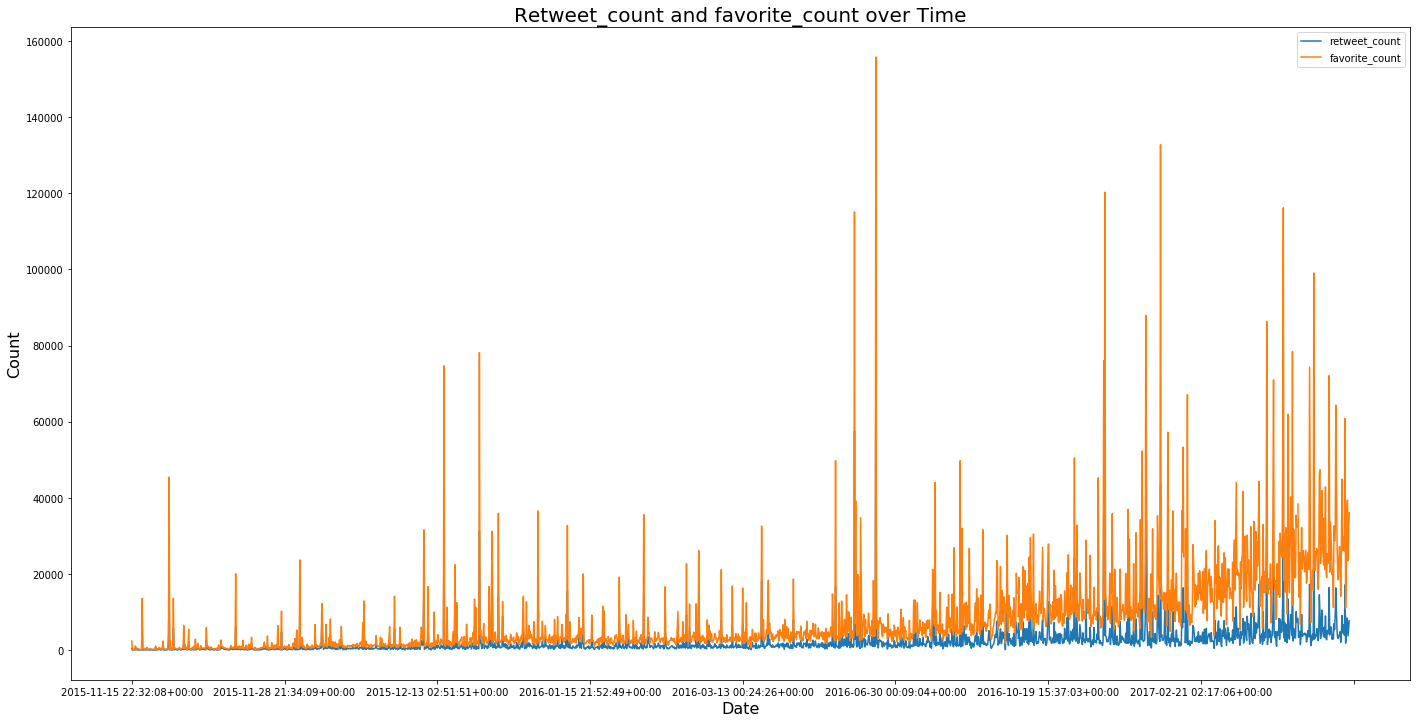

In [88]:
master_archive.plot.line(y =['retweet_count', 'favorite_count'], x = 'timestamp', figsize=(24,12))
plt.title('Retweet_count and favorite_count over Time', fontsize = 20)
plt.xlabel('Date', fontsize = 16)
plt.savefig('retw_fav_date.png')
plt.ylabel('Count', fontsize = 16);

#### 3. Relation between Retweets and Favorites

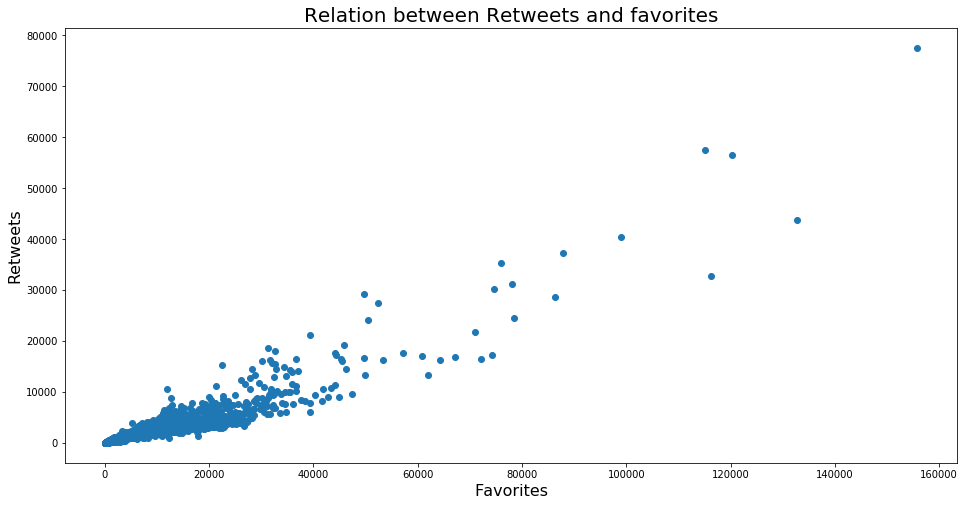

In [89]:
# Plot the relationship between retweets and favorites using scatterplot
plt.figure(figsize = (16,8))
plt.scatter(master_archive['favorite_count'], master_archive['retweet_count'])
plt.xlabel('Favorites', fontsize = 16)
plt.ylabel('Retweets', fontsize = 16)
plt.title('Relation between Retweets and favorites', fontsize = 20)
plt.savefig('relation_retw_favor.png')
plt.show()

#### 4. Plot the correlation between retweets and favorites using heatmap

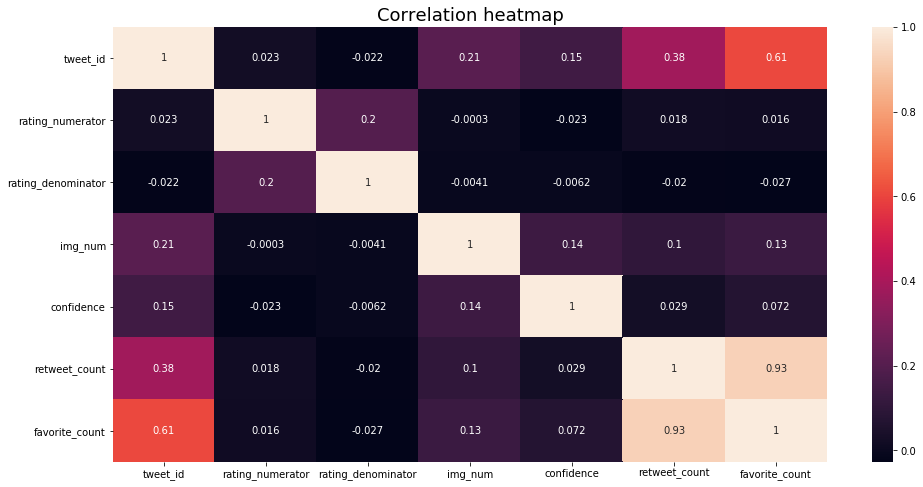

In [90]:
# correlation heatmap
import seaborn as sns
plt.figure(figsize = (16,8))
correl = master_archive.corr()
plt.title('Correlation heatmap', fontsize=18)
sns.heatmap(correl, xticklabels=correl.columns.values, yticklabels=correl.columns.values,annot = True)
plt.savefig('correlationHeatmap.png');